## Quiz #0503

### "Data Augmentation"

#### Answer the following questions by providing Python code:
#### Objectives:
- Code the helper functions.
- Optimize and test a predictive model of your choice.
- Carry out data aumentation in order to improve the predictive accuracy when the given training data is small.

In [125]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from scipy.ndimage.interpolation import rotate
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the original data can be found [here](http://yann.lecun.com/exdb/mnist/).

- The data we will be using is a small subset of the original data with only 100 observations.
- Each observation is the "flattened" version of a image.
- The first column corresponds to the label (Y).
- The image size is 28x28.

In [126]:
# Read the training and testing data separately.
data_train = pd.read_csv('data_mnist_train_100.csv', header=None,encoding='latin1')
data_test = pd.read_csv('data_mnist_test_100.csv', header=None,encoding='latin1')

# Scale and split the data set into X and Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

In [127]:
X_train.shape

(100, 784)

1). The helper function 'show_data()' visualizes each given observation.

In [128]:
def show_data(X, Y, n, angle=0):
    image_matrix = X[n,:].reshape((28,28))
    image_matrix = rotate(image_matrix, angle, cval=0.01, reshape=False)
    imax = image_matrix.max()
    imin = image_matrix.min()
    image_matrix = ((image_matrix-imin)/(imax-imin))*0.99+0.01
    plt.imshow(image_matrix, cmap='Greys',interpolation='None')
    print(Y[n])

In [129]:
X_train[10,:].shape

(784,)

3


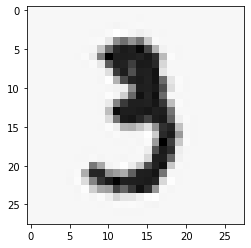

In [130]:
# Example 1.
show_data(X_train, Y_train,10,+10)

3


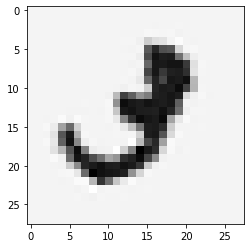

In [131]:
# Example 2.
show_data(X_train, Y_train,10,-30)

1


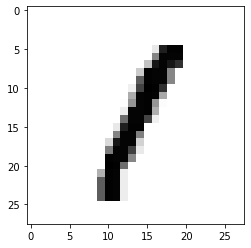

In [132]:
# Example 3.
show_data(X_train, Y_train,77,0)

2). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s).
- Calculate the accuracy.
- Is the accuracy high enough?

In [133]:
clf=RandomForestClassifier(n_estimators=15)
clf.fit(X_train,Y_train)
Y_predict=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_predict)

0.64

In [134]:
# Number of trees in random forest
n_estimators = [x for x in range(10,100,5)]


In [135]:
param_grid = {'n_estimators': n_estimators}


In [136]:
rf_Model = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = -1,scoring='accuracy')
rf_Grid.fit(X_train, Y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    4.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [137]:
rf_Grid.best_params_

{'n_estimators': 85}

In [138]:
clf=RandomForestClassifier(rf_Grid.best_params_['n_estimators'])
clf.fit(X_train,Y_train)
Y_predict=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_predict)

0.7

3). Code the helper function 'rotate_data()' that rotates each given observation by an angle. HINT: use scipy.ndimage.interpolation().

In [139]:

def rotate_data(data,angle):
  image_matrix = data.reshape((28,28))
  image_matrix = rotate(image_matrix, angle, cval=0.01, reshape=False)
  return image_matrix.reshape(1,-1)

3


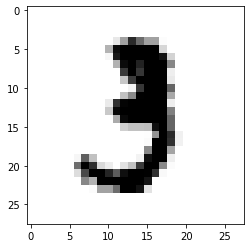

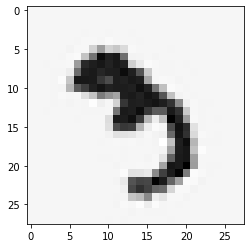

In [140]:
im=rotate_data(X_train[10,:],45)
show_data(X_train,Y_train,10)
plt.show()
plt.imshow(im.reshape(28,28),cmap='Greys')

4). Augment the training dataset.
- Increase the size of the training dataset by introducing slight rotations (clockwise and counterclockwise).
- Use the 'rotate_data()' function defined in the previous step.
- No need to augment the testing dataset.
- Target approximately five fold aumentation.

In [141]:
X_train

array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       ...,
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]])

In [142]:
angle=np.random.randint(-90,90)
angle

-63

In [143]:
for i,data in enumerate(X_train):
  for _ in range(5):
    angle=np.random.randint(-50,50)
    new_data=rotate_data(data,angle)

    X_train=np.append(X_train,new_data,axis=0)
    Y_train=np.append(Y_train,np.full((1),Y_train[i]),axis=0)

In [144]:
X_train.shape

(600, 784)

In [145]:
Y_train.shape

(600,)

5). Redo the predictive analysis with the augmented training dataset.

- Use the same algorithm as in the step 2).
- Calculate the accuracy.
- Has the accuracy gone up?

In [146]:
clf=RandomForestClassifier(rf_Grid.best_params_['n_estimators'])
clf.fit(X_train,Y_train)
Y_predict=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_predict)

0.7

no increase in accuracy



we double the training set another time

In [147]:
for i,data in enumerate(X_train):
    angle=np.random.randint(-50,50)
    new_data=rotate_data(data,angle)

    X_train=np.append(X_train,new_data,axis=0)
    Y_train=np.append(Y_train,np.full((1),Y_train[i]),axis=0)

In [148]:
X_train.shape

(1200, 784)

In [149]:
clf=RandomForestClassifier(rf_Grid.best_params_['n_estimators'])
clf.fit(X_train,Y_train)
Y_predict=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_predict)

0.73

slight amelioration

In [150]:
for i,data in enumerate(X_train):
    angle=np.random.randint(-50,50)
    new_data=rotate_data(data,angle)

    X_train=np.append(X_train,new_data,axis=0)
    Y_train=np.append(Y_train,np.full((1),Y_train[i]),axis=0)

In [151]:
clf=RandomForestClassifier(rf_Grid.best_params_['n_estimators'])
clf.fit(X_train,Y_train)
Y_predict=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_predict)

0.74

The accuracy doesn't exceed 0.75 even with data augmentation

Trying another model

In [152]:
knn=KNeighborsClassifier()
param_grid = dict(n_neighbors=list(range(1, 31)))
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train,Y_train)
grid.best_params_

{'n_neighbors': 1}

In [154]:
knn=KNeighborsClassifier(1)
knn.fit(X_train,Y_train)
Y_predict=knn.predict(X_test)
accuracy_score(Y_test,Y_predict)

0.78